<a href="https://colab.research.google.com/github/Fahad2917/DataScience_MachineLearning/blob/main/DLDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing necessary libraries and the dataset

You first have to copy the csv to your personal drive into a folder called DLDS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')

# Load data
file_path = '/content/drive/MyDrive/DLDS/data_psychology.csv'
df = pd.read_csv(file_path)


print(df.head())
print(df.columns)
print(df.info())
print(df.isnull().sum())


Mounted at /content/drive
                   DATAFLOW        LAST UPDATE freq    age isced97 sex  \
0  ESTAT:HLTH_EHIS_HC6(1.0)  20/03/14 23:00:00    A  TOTAL   ED0-2   F   
1  ESTAT:HLTH_EHIS_HC6(1.0)  20/03/14 23:00:00    A  TOTAL   ED0-2   F   
2  ESTAT:HLTH_EHIS_HC6(1.0)  20/03/14 23:00:00    A  TOTAL   ED0-2   F   
3  ESTAT:HLTH_EHIS_HC6(1.0)  20/03/14 23:00:00    A  TOTAL   ED0-2   F   
4  ESTAT:HLTH_EHIS_HC6(1.0)  20/03/14 23:00:00    A  TOTAL   ED0-2   F   

   isco08 unit geo  TIME_PERIOD  OBS_VALUE OBS_FLAG  CONF_STATUS  
0  OC2264   PC  AT         2008       10.4      NaN          NaN  
1  OC2264   PC  BE         2008       19.3      NaN          NaN  
2  OC2264   PC  BG         2008        2.1      NaN          NaN  
3  OC2264   PC  CY         2008        7.1      NaN          NaN  
4  OC2264   PC  CZ         2008       12.0      NaN          NaN  
Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'age', 'isced97', 'sex', 'isco08',
       'unit', 'geo', 'TIME_PERIOD', 'OBS_VALUE', 

Renaming values for more intuitive use

In [ ]:
df = df[df['isco08'] == 'OC2634']

df = df.rename(columns={
    'geo': 'country',
    'isced97': 'education_level',
    'OBS_VALUE': 'consultation_rate',
    'sex': 'gender',
    'TIME_PERIOD': 'year'
})

df['education_level'] = df['education_level'].replace({
    'ED0-2': 'Low',
    'ED3_4': 'Medium',
    'ED5_6': 'High'
})

df['age_group'] = df['age'].replace({
    'Y15-24': 'young', 'Y25-34': 'young',
    'Y35-44': 'middle', 'Y45-54': 'middle',
    'Y55-64': 'older', 'Y65-74': 'older', 'Y75-84': 'older',
    'Y_GE85': 'older'
})

df


,DATAFLOW,LAST UPDATE,freq,age,education_level,gender,isco08,unit,country,year,consultation_rate,OBS_FLAG,CONF_STATUS,age_group
16,ESTAT:HLTH_EHIS_HC6(1.0),20/03/14 23:00:00,A,TOTAL,Low,F,OC2634,PC,AT,2008,1.5,NaN,NaN,TOTAL
17,ESTAT:HLTH_EHIS_HC6(1.0),20/03/14 23:00:00,A,TOTAL,Low,F,OC2634,PC,BE,2008,3.3,NaN,NaN,TOTAL
18,ESTAT:HLTH_EHIS_HC6(1.0),20/03/14 23:00:00,A,TOTAL,Low,F,OC2634,PC,BG,2008,0.9,NaN,NaN,TOTAL
19,ESTAT:HLTH_EHIS_HC6(1.0),20/03/14 23:00:00,A,TOTAL,Low,F,OC2634,PC,CY,2008,3.4,NaN,NaN,TOTAL
20,ESTAT:HLTH_EHIS_HC6(1.0),20/03/14 23:00:00,A,TOTAL,Low,F,OC2634,PC,CZ,2008,1.0,NaN,NaN,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,ESTAT:HLTH_EHIS_HC6(1.0),20/03/14 23:00:00,A,Y_GE85,TOTAL,T,OC2634,PC,FR,2008,0.6,NaN,NaN,older
2950,ESTAT:HLTH_EHIS_HC6(1.0),20/03/14 23:00:00,A,Y_GE85,TOTAL,T,OC2634,PC,HU,2008,2.3,NaN,NaN,older
2951,ESTAT:HLTH_EHIS_HC6(1.0),20/03/14 23:00:00,A,Y_GE85,TOTAL,T,OC2634,PC,LV,2008,2.4,NaN,NaN,older
2952,ESTAT:HLTH_EHIS_HC6(1.0),20/03/14 23:00:00,A,Y_GE85,TOTAL,T,OC2634,PC,PL,2008,1.1,NaN,NaN,older


Research Question 2

How do gender and educational attainment affect the likelihood of consulting a psychologist across European countries?

Average Consultation Rate by Gender:
gender
F    3.195332
M    2.307592
T    2.607014
Name: consultation_rate, dtype: float64

Average Consultation Rate by Education Level:
education_level
High      3.179200
Low       2.828387
Medium    2.545161
TOTAL     2.420222
Name: consultation_rate, dtype: float64


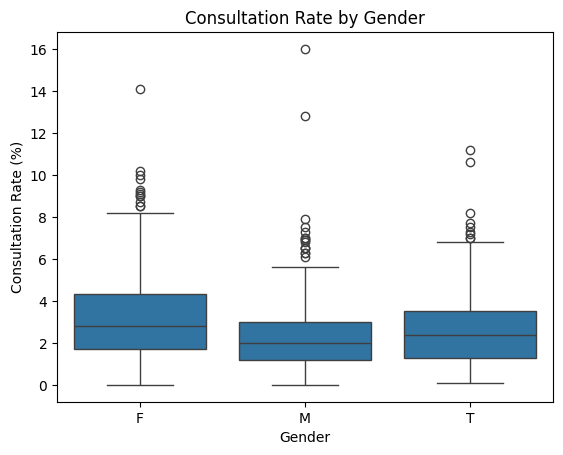

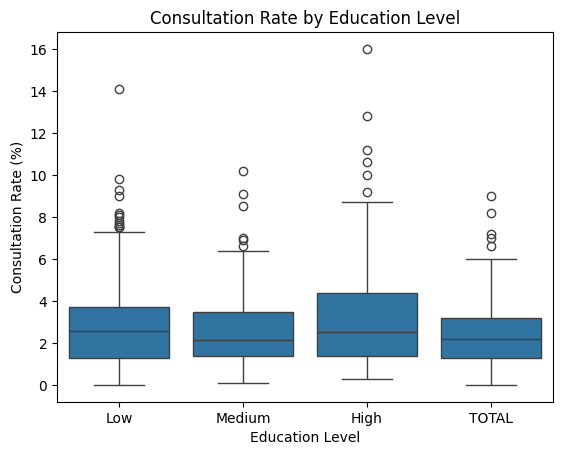

In [ ]:
#gender_summary = df.groupby('gender')['consultation_rate'].mean()
#print(gender_summary)

#edu_summary = df.groupby('education_level')['consultation_rate'].mean()
#print(edu_summary)

#sns.boxplot(data=df, x='gender', y='consultation_rate')
#plt.title('Consultation by Gender')
#plt.show()

#sns.boxplot(data=df, x='education_level', y='consultation_rate')
#plt.title('Consultation by Education Level')
#plt.show()
# Mean consultation rate by gender

# Drop 'TOTAL' rows in age_group to clean data
df_filtered = df[df['age_group'] != 'TOTAL']
gender_summary = df_filtered.groupby('gender')['consultation_rate'].mean()
print("Average Consultation Rate by Gender:")
print(gender_summary)

# Mean consultation rate by education
df_filtered = df[df['age_group'] != 'TOTAL']
edu_summary = df_filtered.groupby('education_level')['consultation_rate'].mean()
print("\nAverage Consultation Rate by Education Level:")
print(edu_summary)

# Boxplot: Consultation by Gender
sns.boxplot(data=df_filtered, x='gender', y='consultation_rate')
plt.title('Consultation Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Consultation Rate (%)')
plt.show()

# Boxplot: Consultation by Education Level
sns.boxplot(data=df_filtered, x='education_level', y='consultation_rate')
plt.title('Consultation Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Consultation Rate (%)')
plt.show()


TTest

In [ ]:
#male = df[df['gender'] == 'Male']['consultation_rate']
#female = df[df['gender'] == 'Female']['consultation_rate']

#t_gender, p_gender = stats.ttest_ind(male, female)
#print(f"T-test (Gender): t = {t_gender:.3f}, p = {p_gender:.3f}")

#high_edu = df[df['education_level'] == 'High']['consultation_rate']
#low_edu = df[df['education_level'] == 'Low']['consultation_rate']
#t_edu, p_edu = stats.ttest_ind(high_edu, low_edu)
#print(f"T-test (Education): t = {t_edu:.3f}, p = {p_edu:.3f}")
# Gender T-test: Female vs Male
male = df_filtered[df_filtered['gender'] == 'M']['consultation_rate']
female = df_filtered[df_filtered['gender'] == 'F']['consultation_rate']

if len(male) > 1 and len(female) > 1:
    t_gender, p_gender = stats.ttest_ind(male, female, equal_var=False)
    print(f"\nT-test (Gender): t = {t_gender:.3f}, p = {p_gender:.3f}")
else:
    print("Not enough data for gender t-test.")

# Education T-test: High vs Low
high = df_filtered[df_filtered['education_level'] == 'High']['consultation_rate']
low = df_filtered[df_filtered['education_level'] == 'Low']['consultation_rate']

if len(high) > 1 and len(low) > 1:
    t_edu, p_edu = stats.ttest_ind(high, low, equal_var=False)
    print(f"T-test (Education): t = {t_edu:.3f}, p = {p_edu:.3f}")
    print(p_edu)
else:
    print("Not enough data for education t-test.")



T-test (Gender): t = -6.398, p = 0.000
T-test (Education): t = 1.851, p = 0.065
0.06481919869452578


In [14]:
# Create dummy variables for gender and education
df_reg = pd.get_dummies(df_filtered, columns=['gender', 'education_level'], drop_first=True)

# Define predictors and target variable
# Check the columns of df_reg to see which education levels are present
print("Columns in df_reg:", df_reg.columns)
print("'education_level_High' in df_reg.columns:", 'education_level_High' in df_reg.columns)

# Based on the previous output, select the correct education level columns
# Assuming 'education_level_Low' is the dropped first category
X = df_reg[['gender_M', 'gender_T', 'education_level_Medium', 'education_level_High']]
X = sm.add_constant(X)  # Adds intercept
y = df_reg['consultation_rate']
# Convert to numeric just in case
X_numeric = X.astype(float)

# Fit regression model
model = sm.OLS(y, X_numeric).fit()
print(model.summary())

# Residuals vs Fitted Plot
plt.figure(figsize=(10, 6))
sns.regplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, linestyle='--', color='red')
plt.show()

Columns in df_reg: Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'age', 'isco08', 'unit', 'country',
       'year', 'consultation_rate', 'OBS_FLAG', 'CONF_STATUS', 'age_group',
       'gender_M', 'gender_T', 'education_level_Low', 'education_level_Medium',
       'education_level_TOTAL'],
      dtype='object')
'education_level_High' in df_reg.columns: False


KeyError: "['education_level_High'] not in index"

NameError: name 'model' is not defined

<Figure size 1000x600 with 0 Axes>

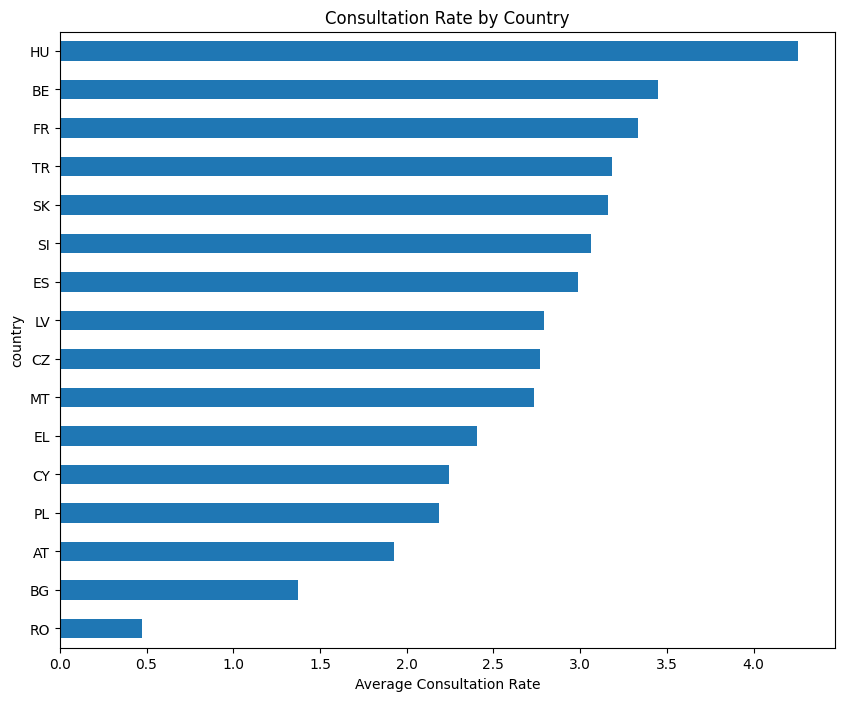

In [15]:
country_means = df.groupby('country')['consultation_rate'].mean().sort_values()
country_means.plot(kind='barh', figsize=(10, 8), title="Consultation Rate by Country")
plt.xlabel("Average Consultation Rate")
plt.show()

## 2 Research Question 2

*How do consultation rates differ across European countries, and can countries be grouped by similarities in age- and education-based patterns of mental healthcare use?*

In [ ]:
To apply an ANOVA to our DAT we have to clarify wether it can be applyed

Differences in use through countries, examined through ANOVA

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 10
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 45, but rank is 22
  warnings.warn('covariance of constraints does not have full '
/usr/loc

                                            sum_sq     df             F  \
C(country)                            6.765938e+02   15.0  3.866419e+01   
C(education_level)                    4.094262e+01    3.0  1.169840e+01   
C(age)                               -4.494771e-07    8.0 -4.816036e-08   
C(country):C(education_level)         1.799071e+02   45.0  3.426952e+00   
C(country):C(age)                     1.034300e+03  120.0  7.388178e+00   
C(education_level):C(age)             1.181672e+02   24.0  4.220442e+00   
C(country):C(education_level):C(age)  1.099617e+03  360.0  2.618251e+00   
Residual                              1.068620e+03  916.0           NaN   

                                            PR(>F)  
C(country)                            1.348663e-63  
C(education_level)                    6.531681e-04  
C(age)                                1.000000e+00  
C(country):C(education_level)         2.029386e-07  
C(country):C(age)                     7.212268e-58  
C(educ

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 10
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 45, but rank is 22
  warnings.warn('covariance of constraints does not have full '
/usr/loc

+--------------------------------------+----------------+------+---------------+-------------+---------------+
|                                      |         sum_sq |   df |             F |      p-Wert | Signifikanz   |
+======================================+================+======+===============+=============+===============+
| C(country)                           |  676.594       |   15 |  38.6642      |   1.349e-63 | ***           |
+--------------------------------------+----------------+------+---------------+-------------+---------------+
| C(education_level)                   |   40.9426      |    3 |  11.6984      |   0.0006532 | ***           |
+--------------------------------------+----------------+------+---------------+-------------+---------------+
| C(age)                               |   -4.49477e-07 |    8 |  -4.81604e-08 |   1         | n.s.          |
+--------------------------------------+----------------+------+---------------+-------------+---------------+
|

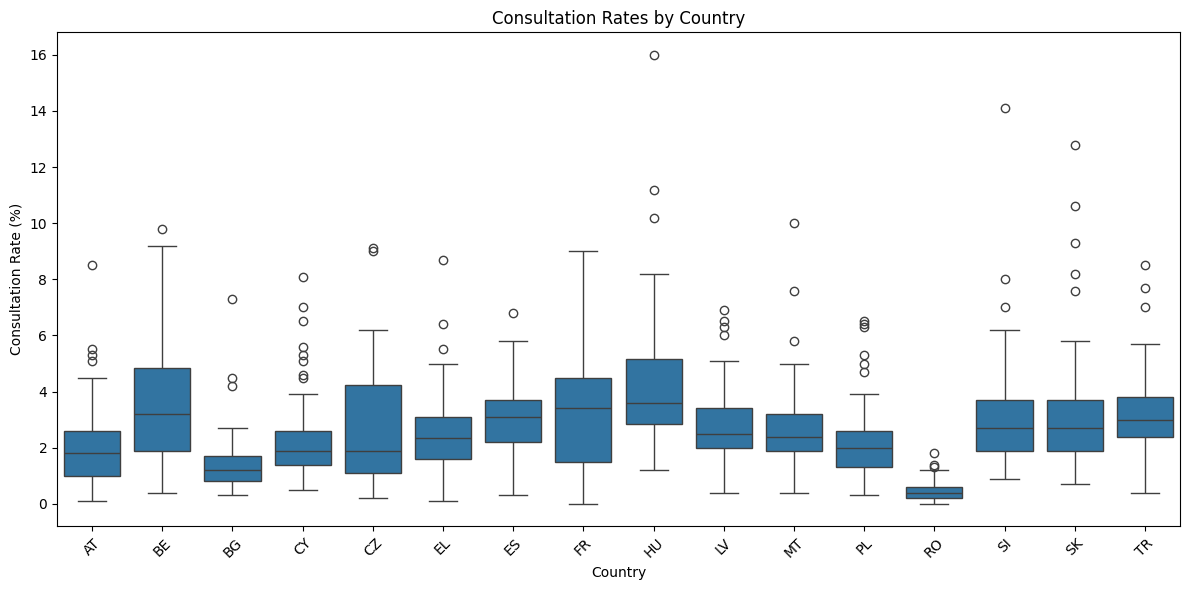

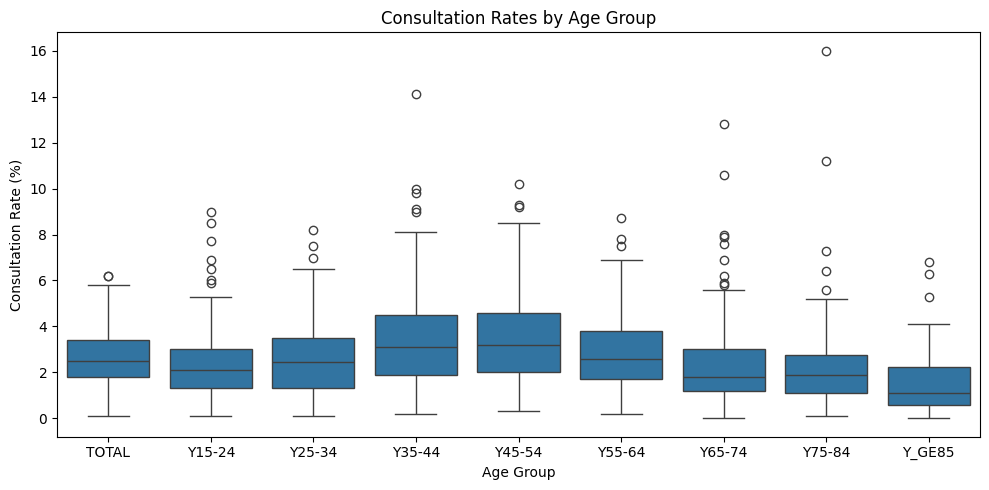

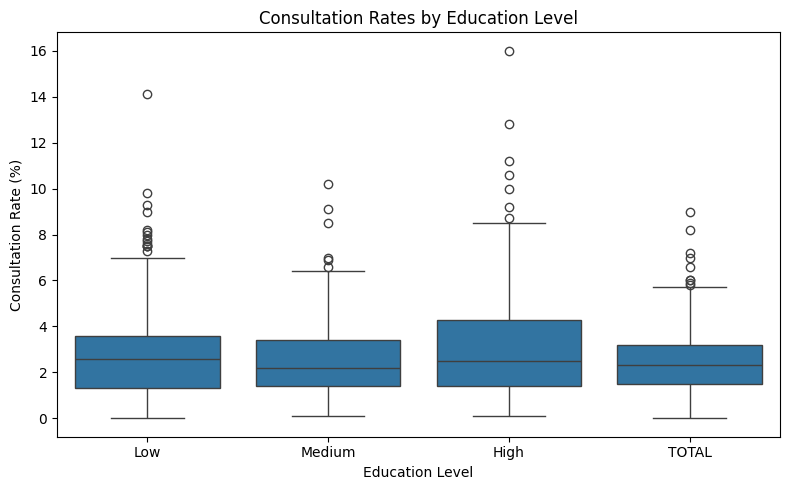

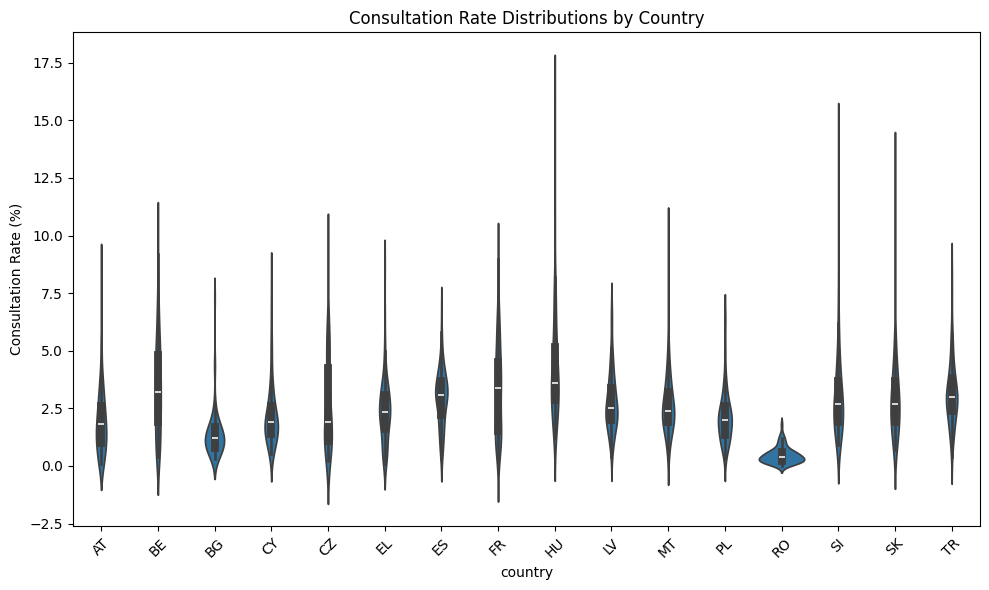

In [ ]:
# Three-way ANOVA (main effects only)
anova_multi = smf.ols('consultation_rate ~ C(country)*C(education_level)*C(age)', data=df).fit()
anova_table_multi = sm.stats.anova_lm(anova_multi, typ=2)

print(anova_table_multi)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ANOVA-Ergebnisse in DataFrame umwandeln
anova_df = pd.DataFrame(sm.stats.anova_lm(anova_multi, typ=2))

# Formatierung verbessern
anova_df["p-Wert"] = anova_df["PR(>F)"].apply(lambda x: f"{x:.3e}")  # Wissenschaftliche Notation
anova_df["Signifikanz"] = anova_df["PR(>F)"].apply(
    lambda x: "***" if x < 0.001 else "**" if x < 0.01 else "*" if x < 0.05 else "n.s."
)

# Schönere Ausgabe
print(anova_df[["sum_sq", "df", "F", "p-Wert", "Signifikanz"]].to_markdown(tablefmt="grid"))

plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='consultation_rate', data=df)
plt.title("Consultation Rates by Country")
plt.xticks(rotation=45)
plt.ylabel("Consultation Rate (%)")
plt.xlabel("Country")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
sns.boxplot(x='age', y='consultation_rate', data=df)
plt.title("Consultation Rates by Age Group")
plt.ylabel("Consultation Rate (%)")
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(x='education_level', y='consultation_rate', data=df)
plt.title("Consultation Rates by Education Level")
plt.ylabel("Consultation Rate (%)")
plt.xlabel("Education Level")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.violinplot(x='country', y='consultation_rate', data=df)
plt.title("Consultation Rate Distributions by Country")
plt.xticks(rotation=45)
plt.ylabel("Consultation Rate (%)")
plt.tight_layout()
plt.show()


Clustering of countries with similar patterns of mental health use.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pivot = df.pivot_table(
    index='country',
    columns=['age', 'education_level'],
    values='consultation_rate',
    aggfunc='mean'
).fillna(0)


scaler = StandardScaler()
X = scaler.fit_transform(pivot)


kmeans = KMeans(n_clusters=3, random_state=12)
pivot['cluster'] = kmeans.fit_predict(X)
print(pivot['cluster'])

country
AT    0
BE    2
BG    0
CY    1
CZ    2
EL    1
ES    1
FR    2
HU    2
LV    2
MT    1
PL    0
RO    0
SI    1
SK    1
TR    2
Name: cluster, dtype: int32


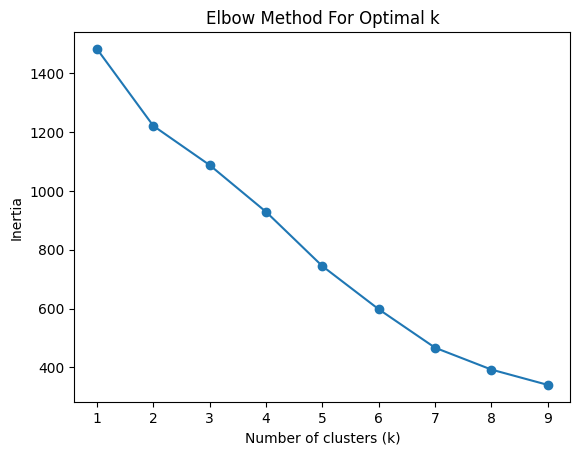

k=2: silhouette score = 0.18
k=3: silhouette score = 0.10
k=4: silhouette score = 0.11
k=5: silhouette score = 0.11
k=6: silhouette score = 0.12
k=7: silhouette score = 0.07
k=8: silhouette score = 0.10
k=9: silhouette score = 0.10


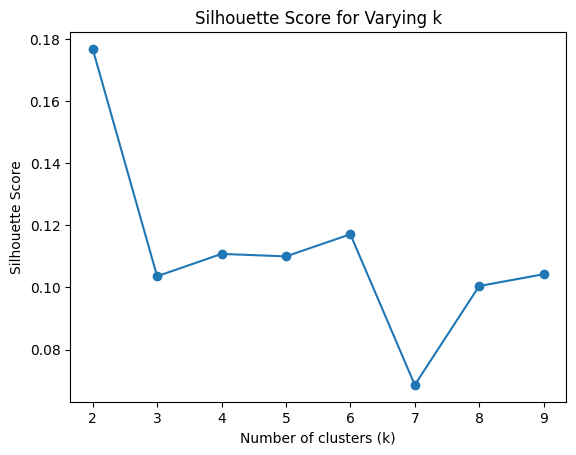

In [ ]:
# number of clusters to use
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=12)
    kmeans.fit(pivot)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f'k={k}: silhouette score = {score:.2f}')

# Visualize the silhouette scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Varying k')
plt.show()

Cluster 1: BG, RO
Cluster 2: AT, CY, CZ, EL, HU, LV, MT, PL, SI, SK, TR
Cluster 3: BE, ES, FR


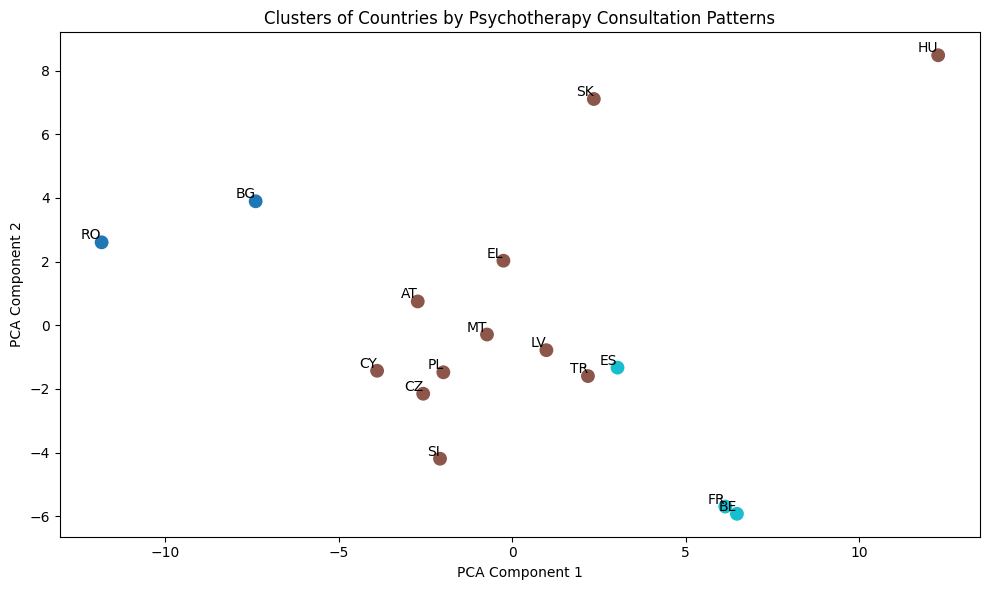

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=11)
 # 11, 20, 34 # für 4: 22, 39
pivot['cluster'] = kmeans.fit_predict(X)
for cluster_label in sorted(pivot['cluster'].unique()):
    countries_in_cluster = pivot[pivot['cluster'] == cluster_label].index.tolist()
    print(f"Cluster {cluster_label + 1}: {', '.join(countries_in_cluster)}")

pca = PCA(n_components=2)
coords = pca.fit_transform(pivot.drop(columns='cluster'))

plt.figure(figsize=(10, 6))
scatter = plt.scatter(coords[:, 0], coords[:, 1], c=pivot['cluster'], cmap='tab10', s=80)
for i, country_code in enumerate(pivot.index):
    plt.text(coords[i, 0], coords[i, 1], country_code, fontsize=10, ha='right', va='bottom')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters of Countries by Psychotherapy Consultation Patterns")
plt.tight_layout()
plt.show()


Conclusion:
Based on this dataset we can not cluster the countries with certainty.
It is more likely, that the countries are similar, but small outliers exist.

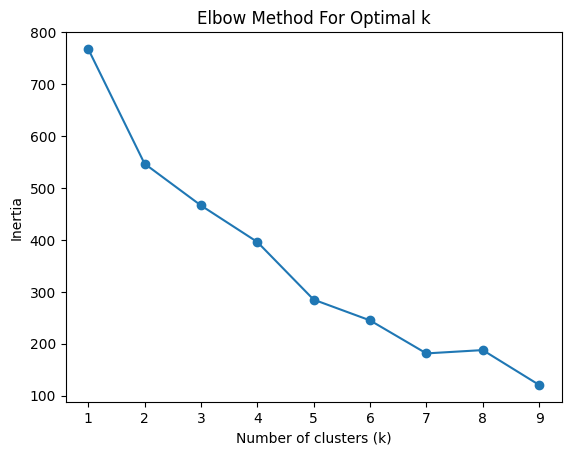

k=2: silhouette score = 0.20
k=3: silhouette score = 0.16
k=4: silhouette score = 0.14
k=5: silhouette score = 0.17
k=6: silhouette score = 0.15
k=7: silhouette score = 0.17
k=8: silhouette score = 0.10
k=9: silhouette score = 0.13


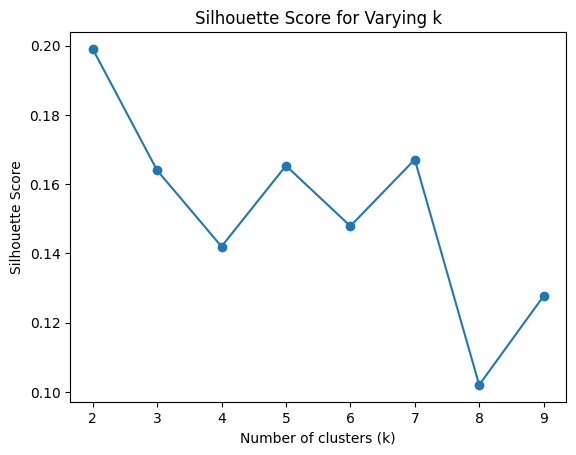

gender          cluster
education_level        
age_group              
country                
AT                    1
BE                    0
BG                    1
CY                    1
CZ                    1
EL                    1
ES                    0
FR                    0
HU                    0
LV                    1
MT                    1
PL                    1
RO                    1
SI                    1
SK                    1
TR                    0


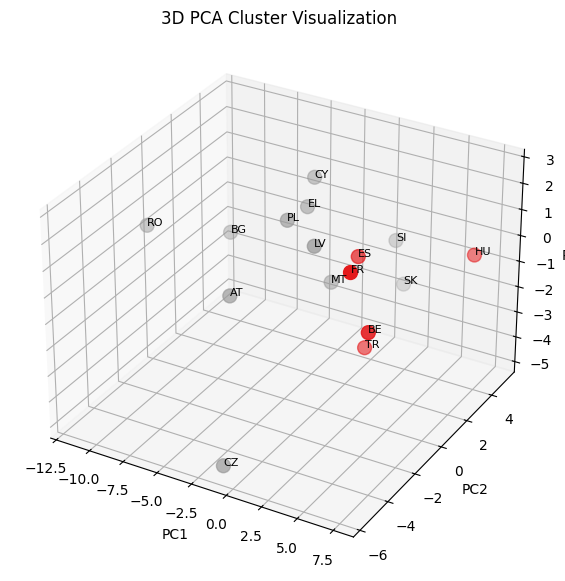

In [ ]:
grouped = df.groupby(['country', 'gender', 'education_level', 'age_group'])['consultation_rate'].mean().reset_index()

pivoted = grouped.pivot_table(
    index='country',
    columns=['gender', 'education_level', 'age_group'],
    values='consultation_rate'
)

pivoted = pivoted.fillna(0)  # or use .dropna() to exclude incomplete countries

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(pivoted)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Silhouette score
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f'k={k}: silhouette score = {score:.2f}')

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Varying k')
plt.show()


# Choose best k from above
best_k = 2  # example
kmeans = KMeans(n_clusters=best_k, random_state=0)
pivoted['cluster'] = kmeans.fit_predict(X_scaled)

# View the clusters
print(pivoted[['cluster']])

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # enables 3D plotting
import matplotlib.pyplot as plt

# Perform PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# Get cluster labels
labels = pivoted['cluster']

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=labels, cmap='Set1', s=100
)

# Annotate points with country codes
for i, country in enumerate(pivoted.index):
    ax.text(X_pca_3d[i, 0], X_pca_3d[i, 1], X_pca_3d[i, 2], country, size=8)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Cluster Visualization')

plt.show()
